### Logistic Regression

This is to implement logistic regression based on PyTorch. 

As the only difference between logistic regression and linear regression is that logistic regression will add a **sigmoid function** based on linear regression to convert output to 0 to 1 represents the `probability of each class`, one thing to notice: logistic regression could just do binary classification, but we could use other solutions to make it to fit on multi-class classification problem. **sigmoid function = 1. / (1. + exp(-x))**. 

One thing that I recommend: if you just want to make Linear Regression or Logistic Regression, please just use something else module like sklearn if your data isn't very large!R

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tempfile
import shutil
import os

style.use("ggplot")

In [2]:
# hyper-parameters
input_size = 4
output_size = 2
learning_rate = .01
epochs = 500

In [3]:
# logistic regression class
class LogisticNet(nn.Module):
    def __init__(self):
        super(LogisticNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = x.float()    # convert to float data type
        # x = F.relu(self.fc(x))    # linear combine with features
        x = torch.sigmoid(self.fc(x))   # convert linear output to probability
        return x

In [5]:
# Get data
# just use Iris data set as example and get the two classes
x, y = load_iris(return_X_y=True)
x, y = x[:100], y[:100]

# split data to train and test data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=1234)

# convert ndarray to Tensor
xtrain = torch.from_numpy(xtrain)
xtest = torch.from_numpy(xtest)
# here for label we call squeeze_() function to remove the 1D dimension in case
# you could reference this for why need this for cross-entropy:
# https://stackoverflow.com/questions/49206550/pytorch-error-multi-target-not-supported-in-crossentropyloss
ytrain = torch.from_numpy(ytrain).long().squeeze_()    # convert to n * 1 as float type
ytest = torch.from_numpy(ytest).long().squeeze_()

In [6]:
# as we get data, then we could instance our model
model = LogisticNet()
print("Model Structure: ", model)

Model Structure:  LogisticNet(
  (fc): Linear(in_features=4, out_features=2, bias=True)
)


In [7]:
# then we could instance our training optimizer and evaluation metrics
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [8]:
# store training and testing loss
train_loss_list = []
test_loss_list = []

In [9]:
# we get whole things we need, then we could start training
for epoch in range(epochs):
    # get the first pass prediction
    pred_train = model(xtrain)

    # then get the loss compare with truth data and prediction data
    loss_train = criterion(pred_train, ytrain)

    # then we could do the backward step to get the whole parameters' gradient
    optimizer.zero_grad()
    loss_train.backward()

    # after get the gradient, we should update our model parameter according to the optimizer change logic
    optimizer.step()

    # then we could evaluate our trained model on test data to get the loss
    # also here we don't need the gradient for test data
    with torch.no_grad():
        pred_test = model(xtest)
        loss_test = criterion(pred_test, ytest)

    # get the training loss and test loss
    train_loss_list.append(loss_train)
    test_loss_list.append(loss_test)

    if epoch % 10 == 0:
        print("{Epoch: %d, train loss: %.2f, test loss: %.2f}" % (epoch, loss_train, loss_test))


{Epoch: 0, train loss: 0.68, test loss: 0.63}
{Epoch: 10, train loss: 0.65, test loss: 0.59}
{Epoch: 20, train loss: 0.60, test loss: 0.55}
{Epoch: 30, train loss: 0.54, test loss: 0.51}
{Epoch: 40, train loss: 0.49, test loss: 0.48}
{Epoch: 50, train loss: 0.46, test loss: 0.45}
{Epoch: 60, train loss: 0.43, test loss: 0.43}
{Epoch: 70, train loss: 0.41, test loss: 0.41}
{Epoch: 80, train loss: 0.40, test loss: 0.40}
{Epoch: 90, train loss: 0.39, test loss: 0.39}
{Epoch: 100, train loss: 0.38, test loss: 0.38}
{Epoch: 110, train loss: 0.37, test loss: 0.37}
{Epoch: 120, train loss: 0.37, test loss: 0.37}
{Epoch: 130, train loss: 0.36, test loss: 0.36}
{Epoch: 140, train loss: 0.36, test loss: 0.36}
{Epoch: 150, train loss: 0.35, test loss: 0.35}
{Epoch: 160, train loss: 0.35, test loss: 0.35}
{Epoch: 170, train loss: 0.35, test loss: 0.35}
{Epoch: 180, train loss: 0.35, test loss: 0.35}
{Epoch: 190, train loss: 0.34, test loss: 0.34}
{Epoch: 200, train loss: 0.34, test loss: 0.34}
{Ep

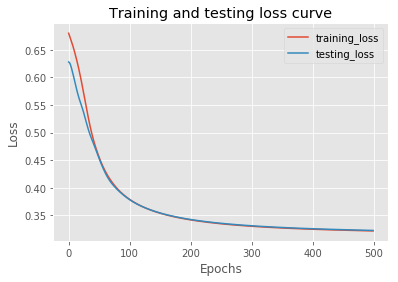

In [12]:
# then we could plot the train and test data loss curve
plt.plot(range(len(train_loss_list)), train_loss_list, label='training_loss')
plt.plot(range(len(test_loss_list)), test_loss_list, label='testing_loss')

plt.title("Training and testing loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.show()
# this is so great the we found that we do make both train and test loss decrease!
# also you would find that the loss doesn't change after 300 epochs, that means we converge to local mimimum.

In [13]:
# we could save our trained model checkpoint to disk, here I just save
# it to a temperate folder, you could just change the path you want
tmp_path = tempfile.mkdtemp()
torch.save(model.state_dict(), os.path.join(tmp_path, 'model.ckpt'))
print("Get model:", os.listdir(tmp_path))
# remove the temperate folder
shutil.rmtree(tmp_path)

Get model: ['model.ckpt']
